In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
archivo_csv = pd.read_csv('odisea.csv')

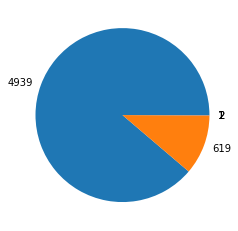

In [21]:
# ¿Cuál es la frecuencia de cada una de las categorías de la columna sex?
x = archivo_csv['sex_'].value_counts()
plt.figure()

plt.pie(x, labels= x)
plt.show()

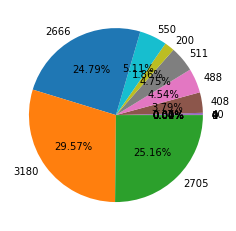

In [23]:
# ¿Cuál es el porcentaje de nulos por columna? 
y = archivo_csv.isnull().sum()

plt.figure()

plt.pie(y, labels= y, autopct='%1.2f%%')
plt.show()


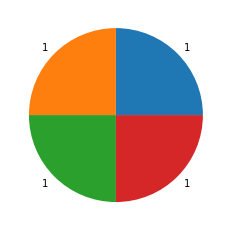

In [41]:
# ¿Cuál es número total de valores únicos de cada una de las columnas categóricas del dataframe?
z = archivo_csv.describe(include= 'object').value_counts()

plt.figure()

plt.pie(z, labels= z)
plt.show()

# Comprobar por qué sale tan perfecto

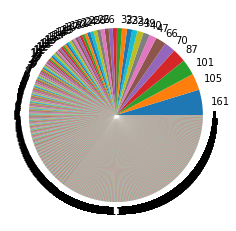

In [45]:
# ¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante
archivo_csv['species_']
s = archivo_csv['species_'].value_counts()

plt.figure()

plt.pie(s, labels= s)
plt.show()